### Homework 3: The perceptron

In this homework we will use the perceptrion and the Perceptron Learning Algorithm (PLA) to do something useful.

Please take the following steps.

1. Download the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)) dataset. 
2. Download the file `wdbc.data` from the `data` folder and load it with `pandas`.
3. Theoretically `wdbc.names` would explain the data, but it seems to be wrong.  Instead, use the description that is on the intro page linked above to understand what the data means.
4. In the target column, use pandas to replace M (malignant) with 1 and B (benign) with -1.
5. Throw out the ID column.
6. Copy the target column into a variable `y`.
7. Perform min-max scaling on `X`.
8. Add a bias column to `X`.
9. Use the pocket algorithm (as described in the notes) to fit a perceptron to `X` and `y`.
10. Tweak the parameter `eta` and the maximum epochs to get the best `w` you can.
11. Print out the percentage of data points your model classifies correctly in the training set `X`. 


In [24]:
df = pd.read_csv('wdbc.data',header=None).replace("B",-1).replace('M',1)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
501,91504,1,13.82,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,...,16.010,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830
561,925311,-1,11.20,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
365,901088,1,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.097990,0.077850,...,24.310,26.37,161.20,1780.0,0.13270,0.23760,0.27020,0.17650,0.2609,0.06735
307,89346,-1,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
75,8610404,1,16.07,19.65,104.10,817.7,0.09168,0.08424,0.097690,0.066380,...,19.770,24.56,128.80,1223.0,0.15000,0.20450,0.28290,0.15200,0.2650,0.06387


In [21]:
X=df.loc[:,2:].values

In [22]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [25]:
import numpy as np
y = df.loc[:,1]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568   -1
Name: 1, Length: 569, dtype: int64

In [29]:
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

In [33]:
X = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))


array([[0.31279284, 0.27494082, 0.29334531, ..., 0.17817869, 0.15178395,
        0.04978355],
       [0.13015287, 0.19039567, 0.13813835, ..., 0.53986254, 0.30415927,
        0.46477765],
       [0.28439585, 0.15285763, 0.27841891, ..., 0.20103093, 0.17090479,
        0.30080021],
       ...,
       [0.16560178, 0.17822117, 0.16377583, ..., 0.31993127, 0.28681254,
        0.27167782],
       [0.41502201, 0.32160974, 0.43749568, ..., 0.73367698, 0.52828701,
        0.32769251],
       [0.27918974, 0.64964491, 0.26750052, ..., 0.22312715, 0.15907747,
        0.11399711]])

In [34]:
X = np.c_[np.ones(X.shape[0]),X]

In [65]:
phi = lambda z: (z >= 0)*2 -1


def PLA(X,y,eta = 0.001,maxepochs=1000):
    w = np.random.randn(X.shape[1])
    best_w = w
    best_acc = 0
    for epoch in range(maxepochs):
        for x,y_i in zip(X,y):
            yhat_i = phi(w.T@x)
            w += eta*(y_i-yhat_i)*x
            yhat = phi(X@w)
            accuracy= np.sum(yhat ==y)/len(yhat)
            if accuracy>best_acc:
                best_w = w.copy()
                best_acc = accuracy
    return w,best_w

w,best_w = PLA(X,y)

In [66]:
yhat = phi(X@w)

np.sum(yhat ==y)/len(yhat)

0.9806678383128296

In [67]:
yhat = phi(X@best_w)

np.sum(yhat ==y)/len(yhat)

0.984182776801406

In [75]:
df = pd.read_csv('data.csv').replace("B",-1).replace('M',1)


In [82]:
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

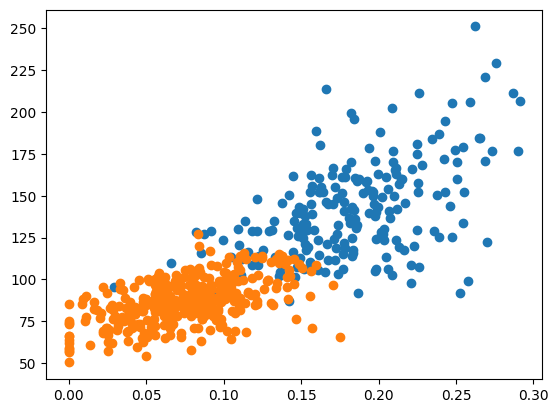

In [88]:
import matplotlib.pyplot as plt
df2d = df[["concave points_worst","perimeter_worst"]]
df2d_pos = df2d[df["diagnosis"]==1]
df2d_neg = df2d[df["diagnosis"]==-1]
plt.scatter(df2d_pos.iloc[:,0],df2d_pos.iloc[:,1])
plt.scatter(df2d_neg.iloc[:,0],df2d_neg.iloc[:,1])

In [77]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
